In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from scipy.stats import linregress

#Import the API key.
from config import weather_api_key

#Import datetime module from datetime library
from datetime import datetime

In [2]:
#Generate a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#create a list of latitudes and longitudes
coordinates = list(lat_lngs)

In [4]:
#Create empty list to hold cities
cities = []
#Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    #If the city is unique, add it to the cities list
    if city not in cities:
        cities.append(city)
#Check the list count to confirm >500 unique cities generated
len(cities)

630

In [5]:
#Starting URL for Weather Map API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

#Create an empty list to hold weather data
city_data = []

#Print a message at the beginning of logging
print("Beginning Data Retrieval\n-------------------------")

#Create record counters
record_count = 1
set_count = 1

#Loop through all the cities in cities[]
for i, city in enumerate(cities):
    
    #Group into sets of 50
    if (i % 50 == 0 and i >= 50):
        set_count += 1
  
        
    #Create endpoint URL with each city, removing blank spaces - concatenate names to reduce liklihood of name errors
    city_url = url + "&q=" + city.replace(" ","+")
    
    #Log the URL, record, set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    #Run API requests for each of the cities
    try:
        #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        #Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        #Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        #Append the city information into city_data dictionary
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    #If an error occurs, skip the city and keep going
    except:
        print(f"City name {city} not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("------------------------\nData Retrieval Complete\n------------------------")

Beginning Data Retrieval
-------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | lucea
Processing Record 3 of Set 1 | mehamn
Processing Record 4 of Set 1 | puerto del rosario
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | betsiamites
Processing Record 8 of Set 1 | nikolskoye
Processing Record 9 of Set 1 | saint-philippe
Processing Record 10 of Set 1 | hithadhoo
Processing Record 11 of Set 1 | novoorsk
Processing Record 12 of Set 1 | sao felix do xingu
Processing Record 13 of Set 1 | belushya guba
City name belushya guba not found. Skipping...
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | butaritari
Processing Record 16 of Set 1 | huarmey
Processing Record 17 of Set 1 | dikson
Processing Record 18 of Set 1 | yatou
Processing Record 19 of Set 1 | taolanaro
City name taolanaro not found. Skipping...
Processing Record 20 of Set 1 | castro
Processing Record 21 of 

Processing Record 182 of Set 4 | chokurdakh
Processing Record 183 of Set 4 | namibe
Processing Record 184 of Set 4 | khash
Processing Record 185 of Set 4 | talnakh
Processing Record 186 of Set 4 | biak
Processing Record 187 of Set 4 | owando
Processing Record 188 of Set 4 | buala
Processing Record 189 of Set 4 | roald
Processing Record 190 of Set 4 | lebu
Processing Record 191 of Set 4 | zolotinka
City name zolotinka not found. Skipping...
Processing Record 192 of Set 4 | nome
Processing Record 193 of Set 4 | aneho
Processing Record 194 of Set 4 | kamenskoye
City name kamenskoye not found. Skipping...
Processing Record 195 of Set 4 | man
Processing Record 196 of Set 4 | carnarvon
Processing Record 197 of Set 4 | verkhoshizhemye
Processing Record 198 of Set 4 | porto santo
Processing Record 199 of Set 4 | coquimbo
Processing Record 200 of Set 4 | avarua
Processing Record 201 of Set 5 | warrenton
Processing Record 202 of Set 5 | port hardy
Processing Record 203 of Set 5 | chapayevka
Proc

Processing Record 361 of Set 8 | tunduru
City name tunduru not found. Skipping...
Processing Record 362 of Set 8 | vylgort
City name vylgort not found. Skipping...
Processing Record 363 of Set 8 | sankheda
Processing Record 364 of Set 8 | dickinson
Processing Record 365 of Set 8 | makakilo city
Processing Record 366 of Set 8 | puri
Processing Record 367 of Set 8 | cabadiangan
Processing Record 368 of Set 8 | komatipoort
Processing Record 369 of Set 8 | tsihombe
City name tsihombe not found. Skipping...
Processing Record 370 of Set 8 | ambodifototra
City name ambodifototra not found. Skipping...
Processing Record 371 of Set 8 | bom jesus
Processing Record 372 of Set 8 | sao miguel do araguaia
Processing Record 373 of Set 8 | north bend
Processing Record 374 of Set 8 | grindavik
Processing Record 375 of Set 8 | deniliquin
Processing Record 376 of Set 8 | marzuq
Processing Record 377 of Set 8 | shubarkuduk
Processing Record 378 of Set 8 | kalas
Processing Record 379 of Set 8 | vila velha


Processing Record 537 of Set 11 | banda aceh
Processing Record 538 of Set 11 | tilichiki
Processing Record 539 of Set 11 | itoman
Processing Record 540 of Set 11 | kangaba
Processing Record 541 of Set 11 | betioky
Processing Record 542 of Set 11 | barbar
City name barbar not found. Skipping...
Processing Record 543 of Set 11 | tongliao
Processing Record 544 of Set 11 | san joaquin
Processing Record 545 of Set 11 | predivinsk
Processing Record 546 of Set 11 | kontagora
Processing Record 547 of Set 11 | antofagasta
Processing Record 548 of Set 11 | ulladulla
Processing Record 549 of Set 11 | port hedland
Processing Record 550 of Set 11 | stolin
Processing Record 551 of Set 12 | tabursuq
Processing Record 552 of Set 12 | tabas
Processing Record 553 of Set 12 | adrar
Processing Record 554 of Set 12 | marsh harbour
Processing Record 555 of Set 12 | kayes
Processing Record 556 of Set 12 | foix
Processing Record 557 of Set 12 | keetmanshoop
Processing Record 558 of Set 12 | charters towers
Pr

In [6]:
#Verify we have at least 500 cities with data
len(city_data)

583

In [7]:
#Convert city_data to a dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,29.86,86,75,18.41,AR,2021-05-27 02:27:38
1,Lucea,18.4510,-78.1736,80.46,83,65,12.71,JM,2021-05-27 02:29:54
2,Mehamn,71.0357,27.8492,39.54,73,86,12.64,NO,2021-05-27 02:29:55
3,Puerto Del Rosario,28.5004,-13.8627,64.15,68,21,9.22,ES,2021-05-27 02:26:04
4,Hermanus,-34.4187,19.2345,55.90,73,100,5.06,ZA,2021-05-27 02:27:52
5,Rikitea,-23.1203,-134.9692,74.70,70,91,17.31,PF,2021-05-27 02:29:55
6,Betsiamites,48.9413,-68.6460,57.60,87,100,13.67,CA,2021-05-27 02:29:55
7,Nikolskoye,59.7035,30.7861,47.79,98,91,4.70,RU,2021-05-27 02:29:56
8,Saint-Philippe,-21.3585,55.7679,69.39,83,19,2.21,RE,2021-05-27 02:29:56
9,Hithadhoo,-0.6000,73.0833,84.09,68,76,19.62,MV,2021-05-27 02:28:05


In [8]:
#Reorder the column 
new_col_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_col_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2021-05-27 02:27:38,-54.8000,-68.3000,29.86,86,75,18.41
1,Lucea,JM,2021-05-27 02:29:54,18.4510,-78.1736,80.46,83,65,12.71
2,Mehamn,NO,2021-05-27 02:29:55,71.0357,27.8492,39.54,73,86,12.64
3,Puerto Del Rosario,ES,2021-05-27 02:26:04,28.5004,-13.8627,64.15,68,21,9.22
4,Hermanus,ZA,2021-05-27 02:27:52,-34.4187,19.2345,55.90,73,100,5.06
...,...,...,...,...,...,...,...,...,...
578,Alanya,TR,2021-05-27 02:32:54,36.5438,31.9998,62.73,57,2,3.09
579,Deqing,CN,2021-05-27 02:32:54,30.5448,119.9599,78.76,58,65,3.13
580,Fonte Boa,BR,2021-05-27 02:32:54,-2.4959,-66.2662,72.97,98,71,0.47
581,Lasa,IT,2021-05-27 02:30:22,46.6166,10.7002,54.48,94,46,4.12


In [9]:
#Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

#Export city_data into a CSV file
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
#Create scatter plots for weather param vs. latitude:
#First extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

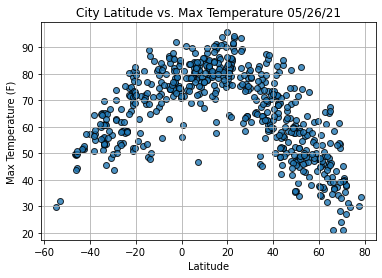

In [11]:
#Import time module to format current date
import time

#Build the scatter plot for latitude vs. max temperature
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

#Incorporate other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save figure in weather_data folder
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

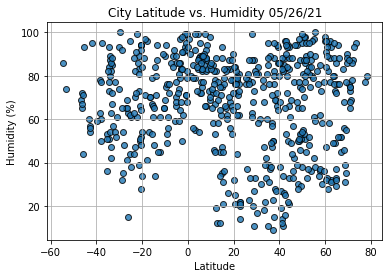

In [12]:
#Build the scatter plot for latitude vs.Humidity
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

#Incorporate other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save figure in weather_data folder
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

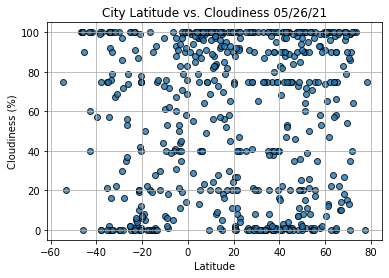

In [13]:
#Build the scatter plot for latitude vs. cloudiness
plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

#Incorporate other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save figure in weather_data folder
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

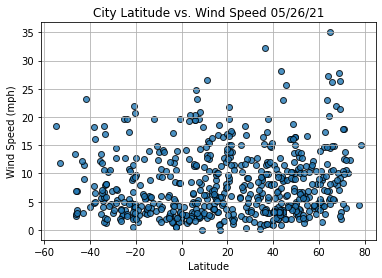

In [14]:
#Build the scatter plot for latitude vs. windspeed
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

#Incorporate other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save figure in weather_data folder
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()

In [51]:
# Create a function to perform linear regression on the weather data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    plt.title(f'{title}')
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [52]:
#Create Norther and Sounthern Hemisphere dataframes
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Lucea,JM,2021-05-27 02:29:54,18.4510,-78.1736,80.46,83,65,12.71
2,Mehamn,NO,2021-05-27 02:29:55,71.0357,27.8492,39.54,73,86,12.64
3,Puerto Del Rosario,ES,2021-05-27 02:26:04,28.5004,-13.8627,64.15,68,21,9.22
6,Betsiamites,CA,2021-05-27 02:29:55,48.9413,-68.6460,57.60,87,100,13.67
7,Nikolskoye,RU,2021-05-27 02:29:56,59.7035,30.7861,47.79,98,91,4.70


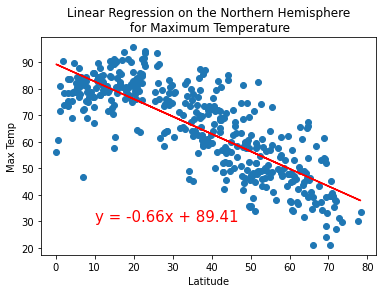

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for Maximum Temperature', 
                       'Max Temp',(10,30))

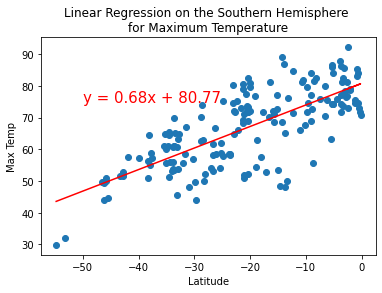

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 
                       'Max Temp',(-50,75))

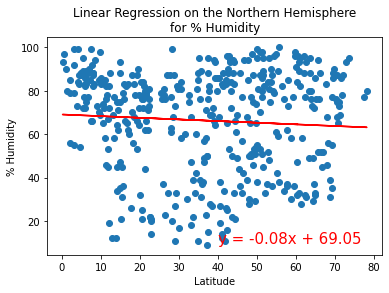

In [57]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor % Humidity', 
                       '% Humidity',(40,10))

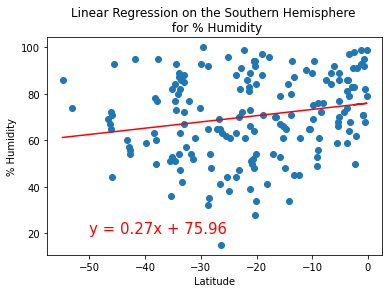

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', 
                       '% Humidity',(-50,20))

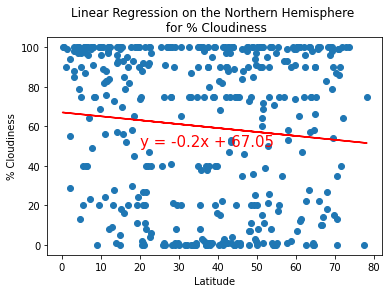

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness',(20,50))

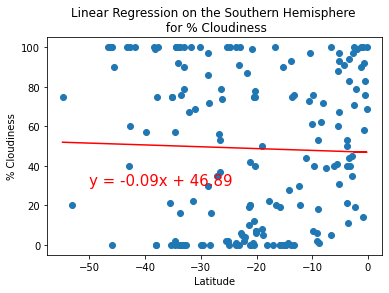

In [61]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness',(-50,30))

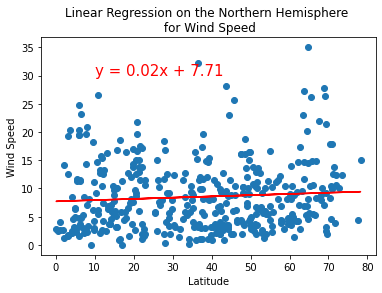

In [65]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 
                       'Wind Speed',(10,30))

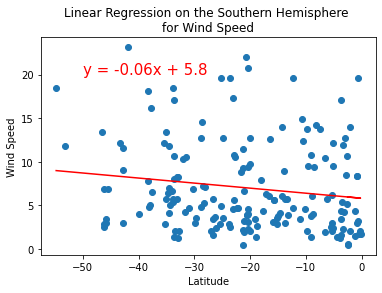

In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 
                       'Wind Speed',(-50,20))